In [1]:
from ultralytics import SAM, FastSAM
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import torch
import numpy as np


image 1/1 /Users/alistairkeiller/marker/shelley.png: 1024x1024 87 objects, 2486.1ms
Speed: 6.1ms preprocess, 2486.1ms inference, 192.8ms postprocess per image at shape (1, 3, 1024, 1024)


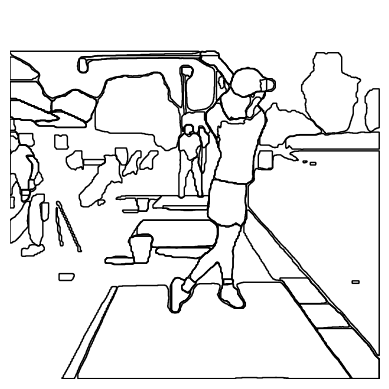

In [2]:
FSAM = FastSAM("FastSAM-x.pt")
FSAM_result = FSAM("shelley.png")
FSAM_result[0].show()

masks = FSAM_result[0].masks
all_xy = masks.xy

fig, ax = plt.subplots()

def add_mask_to_plot(xy, ax):
    path_data = [(Path.MOVETO, tuple(xy[0]))] + [(Path.LINETO, tuple(point)) for point in xy[1:]] + [(Path.CLOSEPOLY, tuple(xy[0]))]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor='none', edgecolor='black')
    ax.add_patch(patch)

for mask_xy in all_xy:
    add_mask_to_plot(mask_xy, ax)

ax.set_xlim(0, masks.orig_shape[1])
ax.set_ylim(masks.orig_shape[0], 0)
ax.set_aspect('equal')

ax.axis('off')

plt.savefig("fast_masks.svg", format="svg")

plt.show()



image 1/1 /Users/alistairkeiller/marker/shelley.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 1 72, 1 73, 1 74, 1 75, 1 76, 1 77, 1 78, 1 79, 1 80, 1 81, 1 82, 1 83, 1 84, 1 85, 1 86, 1 87, 1 88, 1 89, 1 90, 1 91, 1 92, 1 93, 1 94, 1 95, 1 96, 1 97, 1 98, 1 99, 1 100, 1 101, 1 102, 1 103, 1 104, 1 105, 1 106, 1 107, 1 108, 1 109, 1 110, 1 111, 1 112, 231040.8ms
Speed: 12.2ms preprocess, 231040.8ms inference, 336.6ms postprocess per image at shape (1, 3, 1024, 1024)


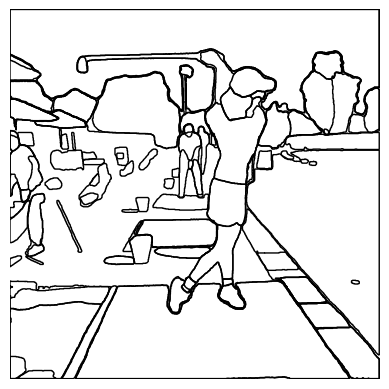

In [3]:
SAM = SAM("sam_l.pt")
SAM_result = SAM("shelley.png")
SAM_result[0].show()

masks = SAM_result[0].masks
all_xy = masks.xy

fig, ax = plt.subplots()

def add_mask_to_plot(xy, ax):
    path_data = [(Path.MOVETO, tuple(xy[0]))] + [(Path.LINETO, tuple(point)) for point in xy[1:]] + [(Path.CLOSEPOLY, tuple(xy[0]))]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor='none', edgecolor='black')
    ax.add_patch(patch)

for mask_xy in all_xy:
    add_mask_to_plot(mask_xy, ax)

ax.set_xlim(0, masks.orig_shape[1])
ax.set_ylim(masks.orig_shape[0], 0)
ax.set_aspect('equal')

ax.axis('off')

plt.savefig("masks.svg", format="svg")

plt.show()
